<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [28]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [29]:
movies.shape

(941, 6)

#### Check the data type of each column.

In [30]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [31]:
movies.duration.mean()

120.76514346439957

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [32]:
#shortest Duration:
movies.sort_values('duration').head(1)

,star_rating,title,content_rating,genre,duration,actors_list
379,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."


In [33]:
#longest Duration:
movies.sort_values('duration').tail(1)

,star_rating,title,content_rating,genre,duration,actors_list
462,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

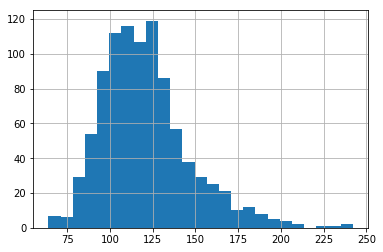

In [34]:

movies.duration.hist(bins=25);

#### Use a box plot to display that same data.

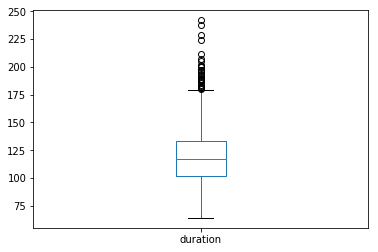

In [35]:
movies.duration.plot(kind='box');

## Intermediate level

#### Count how many movies have each of the content ratings.
Meaning of Content Ratings:

G: General Audiences – all ages admitted

PG: Parental Guidance Suggested – some material may not be suitable for children

PG-13: "Parental Guidance: material may be inappropriate for children under 13"

R: Restricted – under 17 requires accompanying parent or adult guardian

Unrated/Not Rated: Film has not been submitted for a rating or is an uncut version of a film


In [36]:
movies['content_rating'].value_counts()

R            442
PG-13        188
PG           122
NOT RATED     61
APPROVED      46
UNRATED       37
G             32
PASSED         7
GP             3
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

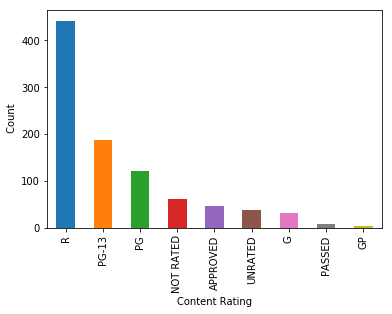

In [37]:
r = movies['content_rating'].value_counts().plot(kind='bar');
r.set_xlabel('Content Rating');
r.set_ylabel(' Count');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [38]:
change_this_to = ['NOT RATED','APPROVED','PASSED','GP']
movies.content_rating = movies.content_rating.replace(change_this_to,'UNRATED')
movies['content_rating'].value_counts()

R          442
PG-13      188
UNRATED    154
PG         122
G           32
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [39]:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [40]:
movies[movies.content_rating.isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
182,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
628,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
899,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [41]:
#replace all null with PG

movies.content_rating.fillna(value='PG',inplace=True)
movies.content_rating.isnull().sum()

0

In [42]:
movies[(movies['title'] == 'True Grit') | (movies['title'] =='Where Eagles Dare' ) |(movies['title'] =='Butch Cassidy and the Sundance Kid' ) ]

,star_rating,title,content_rating,genre,duration,actors_list
182,8.2,Butch Cassidy and the Sundance Kid,PG,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
628,7.7,Where Eagles Dare,PG,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
641,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
899,7.4,True Grit,PG,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [43]:
# mean of star rating for movies 2 hours or longer
movies[movies.duration >= 120].star_rating.mean()

7.952631578947351

In [44]:
#mean of star rating for movies shorter than 2 hours
movies[movies.duration < 120].star_rating.mean()

7.841666666666657

#### Use a visualization to detect whether there is a relationship between duration and star rating.

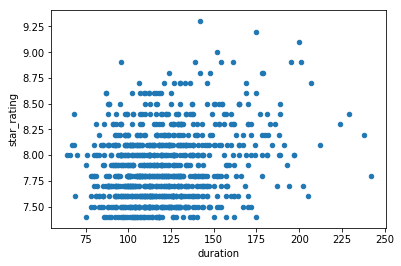

In [45]:
movies.plot(kind='scatter' ,x='duration',y='star_rating');

#### Calculate the average duration for each genre.

In [46]:
movies.groupby('genre').duration.mean()

genre
Action       126.371212
Adventure    133.535211
Animation     96.596774
Biography    132.445946
Comedy       107.771242
Crime        122.243697
Drama        126.301527
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       103.076923
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

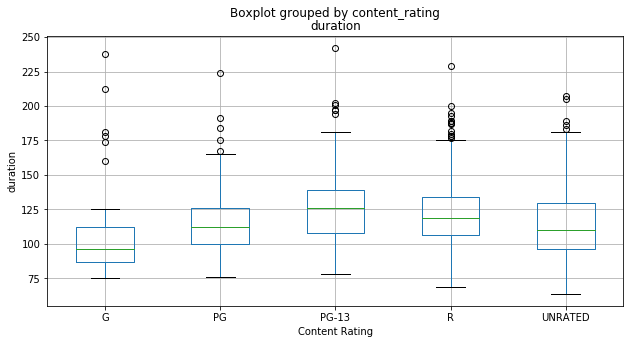

In [47]:
movies.boxplot(column='duration', by='content_rating',figsize=(10,5));
plt.xlabel('Content Rating');
plt.ylabel('duration');

#### Determine the top rated movie (by star rating) for each genre.

In [48]:

top_rated = movies.sort_values('star_rating', ascending=False)
top_rated.groupby('genre').head(1)[['genre', 'title', 'star_rating']]


,genre,title,star_rating
0,Crime,The Shawshank Redemption,9.3
3,Action,The Dark Knight,9.0
5,Drama,12 Angry Men,8.9
6,Western,"The Good, the Bad and the Ugly",8.9
7,Adventure,The Lord of the Rings: The Return of the King,8.9
8,Biography,Schindler's List,8.9
39,Horror,Psycho,8.6
38,Mystery,Rear Window,8.6
35,Comedy,Modern Times,8.6
30,Animation,Spirited Away,8.6


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [49]:
duplicate = movies[movies['title'].duplicated(False)]
duplicate

,star_rating,title,content_rating,genre,duration,actors_list
452,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
467,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
641,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
654,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
677,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
871,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
887,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
899,7.4,True Grit,PG,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [50]:
gc=movies.genre.value_counts()
gc

Drama        262
Comedy       153
Action       132
Crime        119
Biography     74
Adventure     71
Animation     62
Horror        26
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [51]:
valid_genre = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']

genre_filter = movies['genre'].isin(valid_genre)
movies[genre_filter].groupby('genre').mean()['star_rating']

genre
Action       7.891667
Adventure    7.932394
Animation    7.914516
Biography    7.874324
Comedy       7.824837
Crime        7.915966
Drama        7.906489
Horror       7.811538
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [52]:
valid_genre= list(gc[gc>10].index)
genre_filter = movies['genre'].isin(valid_genre)
movies[genre_filter].groupby('genre').mean()['star_rating']

genre
Action       7.891667
Adventure    7.932394
Animation    7.914516
Biography    7.874324
Comedy       7.824837
Crime        7.915966
Drama        7.906489
Horror       7.811538
Mystery      7.975000
Name: star_rating, dtype: float64

In [53]:
genre_filter = movies['genre'].isin(valid_genre)
movies[genre_filter].groupby('genre').mean()['star_rating']

genre
Action       7.891667
Adventure    7.932394
Animation    7.914516
Biography    7.874324
Comedy       7.824837
Crime        7.915966
Drama        7.906489
Horror       7.811538
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [54]:
all_genre= movies.groupby('genre').mean()['star_rating']
all_genre

genre
Action       7.891667
Adventure    7.932394
Animation    7.914516
Biography    7.874324
Comedy       7.824837
Crime        7.915966
Drama        7.906489
Family       7.850000
Fantasy      7.700000
Film-Noir    8.033333
History      8.000000
Horror       7.811538
Mystery      7.975000
Sci-Fi       7.920000
Thriller     7.680000
Western      8.255556
Name: star_rating, dtype: float64

In [55]:
bool_series = movies.genre.value_counts() 
bool_series = bool_series >= 10


all_genre[bool_series]

genre
Action       7.891667
Adventure    7.932394
Animation    7.914516
Biography    7.874324
Comedy       7.824837
Crime        7.915966
Drama        7.906489
Horror       7.811538
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [56]:
movie_agg = movies.groupby('genre').agg(['count', 'mean'])['star_rating']

movie_agg['new_count'] = movie_agg['count']

movie_agg[movie_agg.new_count >= 10]

,count,mean,new_count
genre,,,
Action,132,7.891667,132
Adventure,71,7.932394,71
Animation,62,7.914516,62
Biography,74,7.874324,74
Comedy,153,7.824837,153
Crime,119,7.915966,119
Drama,262,7.906489,262
Horror,26,7.811538,26
Mystery,16,7.975000,16


## Bonus

#### Figure out something "interesting" using the actors data!

In [57]:
#list of actors that participated in several movies 
several_movies=movies.actors_list.value_counts()
several_movies[several_movies>1]


[u'Daniel Radcliffe', u'Emma Watson', u'Rupert Grint']        6
[u'Mark Hamill', u'Harrison Ford', u'Carrie Fisher']          3
[u'Tom Hanks', u'Tim Allen', u'Joan Cusack']                  2
[u'Michael J. Fox', u'Christopher Lloyd', u'Lea Thompson']    2
[u'Ian McKellen', u'Martin Freeman', u'Richard Armitage']     2
Name: actors_list, dtype: int64